In [1]:
# PREPARING TRAINING DATA

from DataPreparation import prepare_dataset

train_data, train_labels, val_data, val_labels, test_data, test_labels = prepare_dataset('./data')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.fit_transform(val_labels)
test_labels = label_encoder.fit_transform(test_labels)

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from Model import create_cnn_model_2 

model = create_cnn_model_2(train_data)
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, verbose=1, validation_data=(val_data, val_labels))

Epoch 1/50


c:\Users\Chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.2562 - loss: -6.6165 - val_accuracy: 0.2505 - val_loss: -8.0233
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.2592 - loss: -7.8833 - val_accuracy: 0.2505 - val_loss: -8.0233
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2453 - loss: -8.7469 - val_accuracy: 0.2505 - val_loss: -8.0233
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.2561 - loss: -8.2023 - val_accuracy: 0.2505 - val_loss: -8.0233
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.2406 - loss: -8.3247 - val_accuracy: 0.2505 - val_loss: -8.0233
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.2559 - loss: -7.7266 - val_accuracy: 0.2505 - val_loss: -8.0233
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.2442 - loss: -8.4058 - val_accuracy: 0.2505 - val_loss: -8.0233
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2494 - loss: -8.123

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 83, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 39, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34048)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,358,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,353,221 (50.94 MB)

 Trainable params: 4,451,073 (16.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,902,148 (33.96 MB)

15/15 - 0s - 25ms/step - accuracy: 0.2527 - loss: -7.9886e+00


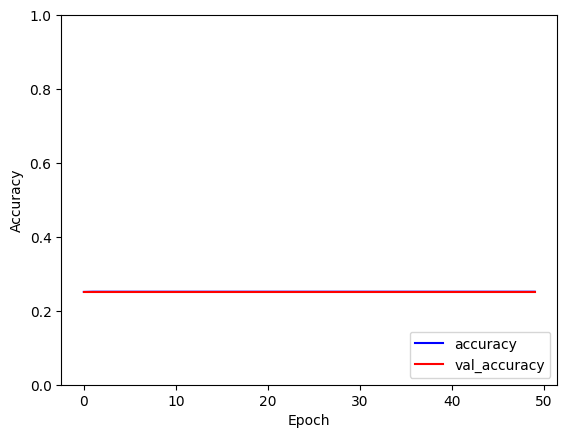

In [6]:
import numpy as np
import matplotlib.pylab as plt

model.summary()
plt.plot(history.history['accuracy'], label='accuracy', color="blue")
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color="red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)